# 0.0.Entendimento do Problema.

**1.Objetivo do Projeto:** O objetivo do projeto é prever se um cliente vai dar churn ou não, ou seja, no fim projeto eu quero ter alguma forma de identificar os clientes que tem um grande potencial de ser churn.

**2.Para que o projeto vai servir?** Acredito que seja pelo motivo da empresa querer saber previamente qual cliente vai deixa-la, assim podendo fazer campanhas, descontos ou coisas do tipo para que consiga manter aquele cliente e assim não perder dinheiro, pois um cliente churn gera muitos prejuízos para empresa.

**3.Qual a métrica de negócio o projeto vai melhorar?** Esse e um problema que afeta todos os tipos de negócio, por exemplo nesse projeto eu vou ter dados do Telecom que geralmente funcionam como um sistema de assinatura mensal, ou seja, a receita é: Receita = valor assinatura * 12, pensando assim caso o cliente de churn que significa cancelar a assinatura no mês de janeiro o prejuízo para empresa vai ser de: Prejuízo = valor assinatura * 12, pois como e um sistema de assinatura as empresas vão deixar de ganhar 12 vezes o valor da assinatura, por esse motivo que o projeto vai afetar diretamente a renda da empresa pois garantido que tal cliente fique ou já se planejando para o possível cancelamento do cliente a empresa tem menos prejuízo.

**4.Prosposta de Solução:** Para Resolver esse problema eu vou usar dados de cliente que não deram churn e cliente que deram churn, pois com base nesses dados eu posso criar um modelo de ML (Machine Learning) que quando o cliente tiver as mesmas ou semelhante características de um cliente que deu churn no passado, ele já avise a empresa que aquele e um possível churn, e assim fazendo a empresa já preparar alguma campanha de marketing que mantenha o cliente ou se preparar para o potencial prejuízo.

**5.O que vamos querer ter no final do projeto?** Tenho dois objetivos no fim do projeto que são:
- 1.Um modelo que tenha uma acurácia maior de 80%, garantindo assim a boa assertividade das previsões.
- 2.Uma classe que funcione como um API, ou seja, que faça todos os processos de limpeza, Rescaling...etc. nos dados que receber e retorne um arquivo json, para que no futuro o modelo possa ser colocado em produção.

OBS: Eu sei que o problema de churn e um acumulado de perca de dinheiro para empresa, não apenas nos primeiros 12 meses, porém eu quis simplificar o cálculo da receita e prejuízo afins didáticos mesmo.

# 1.0.Impots

In [1]:
##pattern libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#----------------------------------
#Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing as pp
from keras import models as ml
from keras import layers as l
#----------------------------------
#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from scikitplot import metrics as mt
#----------------------------------

#Filter Warnings
import warnings
warnings.filterwarnings("ignore")
#-------------------

#Show all columns
pd.set_option('display.max_columns', None)

## 1.1.Load Data

In [2]:
df_raw = pd.read_csv('datasets/Telecom_customer churn.csv')

## 1.2.Help Functions

In [3]:
def data_dimensions(data):
    print('Number of rows: {}'.format(data.shape[0]))
    print('Number of columns: {}'.format(data.shape[1]))
    return None

# 2.0.Data Description

In [4]:
df1 = df_raw.copy()
df1.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


## 2.1.Data Dimensions

In [5]:
data_dimensions(df1)

Number of rows: 100000
Number of columns: 100


## 2.2.Data dtypes

In [6]:
np.array(df1.dtypes.values)
pd.DataFrame(np.array(df1.dtypes.values),np.array(df1.dtypes.index)).T

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,object,object,object,int64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,object,object,object,object,float64,float64,float64,object,float64,float64,object,float64,object,object,float64,object,float64,float64,object,object,float64,object,object,object,object,object,object,object,float64,int64


## 2.3.Change dtypes

In [7]:
#None to change

## 2.4.Check NA values

In [8]:
#get only columns with NA valeus
aux = pd.DataFrame(index=df1.isnull().sum().index, data=df1.isnull().sum().values).rename(columns={0:'Values'})
aux[aux['Values'] > 30000].sort_values(by='Values',ascending=False).index

Index(['numbcars', 'dwllsize', 'HHstatin', 'ownrent', 'dwlltype', 'lor'], dtype='object')

In [9]:
df1.isnull().sum()

rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64

## 2.5.Remove or Fill NA values

**Removendo colunas:** Vou remover as colunas com muitos valores NA nesse primeiro ciclo, como o foco aqui e entender o problema de modo geral, eu vou usar essa tecnica de Remover as colunas com muitos valores NA e apagar os valores NA das outras.

In [10]:
columns_drop = ['numbcars', 'dwllsize', 'HHstatin', 'ownrent', 'dwlltype', 'lor']
df1 = df1.drop(columns_drop,axis=1)

#drop NA valeus
df1 = df1.dropna()

#reset_index
df1 = df1.reset_index(drop=True)

In [11]:
data_dimensions(df1)

Number of rows: 60385
Number of columns: 94


# 3.0.Data Filtering

In [12]:
df2 = df1.copy()
df2.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,marital,adults,infobase,income,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.0,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.000000,42.333333,0.0,45.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.000000,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,132.600000,0.000000,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,S,1.0,M,4.0,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,55.2300,570.50,71.980,0.0000,0.0,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.000000,94.666667,0.0,137.000000,0.000000,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.000000,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.000000,173.476667,0.000000,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,S,1.0,M,6.0,0.0,I,U,U,U,U,U,Y,434.0,1000005
2,82.2750,1312.25,75.000,1.2375,0.0,0.0,0.0,0.0,0.0,156.75,8.1450,52.000000,0.0,7.666667,0.0,76.000000,0.0,702.000000,0.000000,365.000000,0.0,577.333333,0.000000,4.333333,11.000000,7.753333,301.666667,1.333333,369.536667,0.000000,200.320000,370.333333,243.213333,147.000000,85.146667,555.666667,0.000000,382.096667,0.000000,303.666667,0.0,187.760000,0.0,59.666667,702.000000,577.333333,0.0,22.666667,0,59,2,2,Y,C,N,26812,40869.00,4033.98,3932.90,40295.00,26362,83.68,857.34,560.89,1260,960,80,1187.0,853.0,78.0,U,GREAT LAKES AREA,N,N,129.98999,9.0,4.0,WCMB,0.0,0.0,S,1.0,M,6.0,0.0,U,U,U,U,U,U,Y,458.0,1000006
3,31.6625,25.50,29.990,0.2475,0.0,0.0,0.0,0.0,0.0,59.50,4.0275,0.000000,0.0,1.000000,0.0,2.333333,0.0,6.666667,0.000000,0.000000,0.0,3.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,1.866667,0.000000,1.666667,0.0,1.933333,0.0,1.000000,6.666667,3.333333,0.0,0.000000,0,57,2,2,N,A,N,391,994.00,1458.42,1457.84,976.00,377,26.51,17.75,6.85,6,3,30,54.0,7.0,34.0,C,DALLAS AREA,Y,N,79.98999,2.0,2.0,WCMB,0.0,0.0,M,2.0,M,9.0,1.0,N,U,U,U,U,U,Y,601.0,1000010
4,62.1275,97.50,65.985,2.4750,0.0,0.0,0.0,0.0,0.0,23.50,6.8225,0.000000,0.0,0.333333,0.0,4.000000,0.0,19.333333,0.333333,0.000000,0.0,15.000000,0.333333,4.000000,98.666667,96.920000,0.000000,0.000000,136.493333,0.056667,0.000000,3.666667,15.366667,0.000000,0.000000,7.666667,0.333333,66.073333,0.056667,7.333333,0.0,70.420000,0.0,0.333333,19.666667,15.333333,0.0,0.000000,0,59,2,2,Y,A,N,2392,6868.11,3290.73,3195.01,6620.11,2312,56.05,116.14,40.56,90,16,60,123.0,32.0,64.0,C,DALLAS AREA,Y,N,79.98999,3.0,3.0,WCMB,0.0,0.0,S,5.0,M,6.0,0.0,N,Y,U,U,U,U,Y,464.0,1000011


## 3.1.Filter Columns

## 3.2.Filter Rows

# 4.Data Preparation

In [13]:
df3 = df2.copy()

In [14]:
#one hot enconder in categorical data
df3 = pd.get_dummies(df3)

In [15]:
data_dimensions(df3)

Number of rows: 60385
Number of columns: 199


# 5.Feature Selection

In [16]:
df4 = df3.copy()
df4.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,adults,income,forgntvl,eqpdays,Customer_ID,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_A2,crclscod_A3,crclscod_AA,crclscod_B,crclscod_B2,crclscod_BA,crclscod_C,crclscod_C2,crclscod_C5,crclscod_CA,crclscod_CC,crclscod_CY,crclscod_D,crclscod_D2,crclscod_D4,crclscod_D5,crclscod_DA,crclscod_E,crclscod_E2,crclscod_E4,crclscod_EA,crclscod_EC,crclscod_EF,crclscod_EM,crclscod_G,crclscod_GA,crclscod_GY,crclscod_H,crclscod_I,crclscod_J,crclscod_JF,crclscod_K,crclscod_L,crclscod_M,crclscod_O,crclscod_P1,crclscod_TP,crclscod_U,crclscod_U1,crclscod_V,crclscod_V1,crclscod_W,crclscod_Y,crclscod_Z,crclscod_Z1,crclscod_Z2,crclscod_Z4,crclscod_Z5,crclscod_ZA,crclscod_ZY,asl_flag_N,asl_flag_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,area_ATLANTIC SOUTH AREA,area_CALIFORNIA NORTH AREA,area_CENTRAL/SOUTH TEXAS AREA,area_CHICAGO AREA,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTH FLORIDA AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_PHILADELPHIA AREA,area_SOUTH FLORIDA AREA,area_SOUTHWEST AREA,area_TENNESSEE AREA,dualband_N,dualband_T,dualband_Y,refurb_new_N,refurb_new_R,hnd_webcap_WC,hnd_webcap_WCMB,marital_A,marital_B,marital_M,marital_S,marital_U,infobase_M,ethnic_B,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,kid0_2_U,kid0_2_Y,kid3_5_U,kid3_5_Y,kid6_10_U,kid6_10_Y,kid11_15_U,kid11_15_Y,kid16_17_U,kid16_17_Y,creditcd_N,creditcd_Y
0,23.9975,219.25,22.500,0.2475,0.0,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.000000,42.333333,0.0,45.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.000000,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,132.600000,0.000000,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1652,4228.00,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.98999,2.0,2.0,0.0,0.0,1.0,4.0,0.0,361.0,1000001,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1
1,55.2300,570.50,71.980,0.0000,0.0,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.000000,94.666667,0.0,137.000000,0.000000,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.000000,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.000000,173.476667,0.000000,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,4485,14028.00,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,149.98999,6.0,4.0,0.0,0.0,1.0,6.0,0.0,434.0,1000005,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,

In [17]:
X = df4.drop('churn',axis=1)
y = df4['churn']

# 6.Machine Learning

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)

In [19]:
#drop customer id
x_train = X_train.drop('Customer_ID',axis=1)
x_test = X_test.drop('Customer_ID',axis=1)

## 6.1Gaussian NB

In [20]:
model_gaussian = GaussianNB()

#train model
model_gaussian.fit(x_train,y_train)

#predict
result_gausian = model_gaussian.predict(x_test)

## 6.2.LogisticRegression

In [21]:
model_logic = LogisticRegression()

#train data
model_logic.fit(x_train,y_train)

#predict
result_logic = model_logic.predict(x_test)

# 7.0.Perfomance

Accuracy Score Gausian: 50.39%
              precision    recall  f1-score   support

           0       0.58      0.20      0.30      9552
           1       0.49      0.84      0.62      8564

    accuracy                           0.50     18116
   macro avg       0.54      0.52      0.46     18116
weighted avg       0.54      0.50      0.45     18116



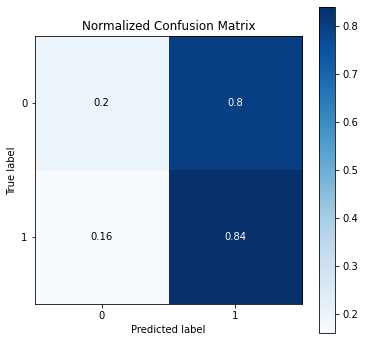

In [24]:
#accuracy
print('Accuracy Score Gausian: {:.2%}'.format(accuracy_score(y_test,result_gausian)))
#Model Gausian
print(classification_report(y_test,result_gausian))

#Model Gausian
mt.plot_confusion_matrix(y_test, result_gausian, normalize=True, figsize=(6,6));

Accuracy Score Logistic: 57.33%
              precision    recall  f1-score   support

           0       0.58      0.67      0.62      9552
           1       0.56      0.47      0.51      8564

    accuracy                           0.57     18116
   macro avg       0.57      0.57      0.57     18116
weighted avg       0.57      0.57      0.57     18116



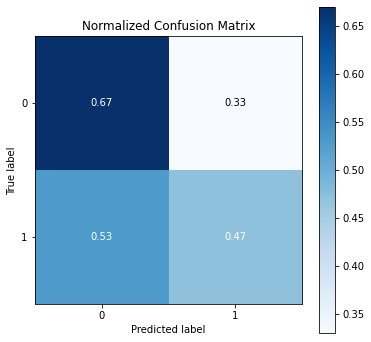

In [25]:
#Model Logistic
print('Accuracy Score Logistic: {:.2%}'.format(accuracy_score(y_test,result_logic)))
print(classification_report(y_test,result_logic))

#Model Logic
mt.plot_confusion_matrix(y_test, result_logic, normalize=True, figsize=(6,6));

# Conclusão

**O que foi feito nessa etapa?**

Nessa etapa eu apenas quir ver o problema que eu vou enfrentar, ou seja, estou apenas conhecendo o 'terreno', por exemplo agora eu sei que vou ter que fazer diversas melhorias nos meus dados ainda, vou lista-los abaixo:
- Limpeza de dados NA: Existem muitas dados NA na base então será necessario excluir as colunas que tem muitos valores NA e preencher as outras.
- Balanceamento de dados: Como estou lidando com um problema de Churn, com certeza temos um desbalanceamento natural dos dados, então vou ter que tratar isso.
- Muitas colunas: Vou ter que selecionar as colunas mais relevantes, pois temos muitas.
- Codificação: Vou ter que melhorar o encondig das minhas variaveis categoricas, ter mais de 150 colunas não e nada perfomatico e saúdavel para os modelos, então vou ter que mudar minha abordagem.
- Validação cruazada: Ainda e necessario aplicar uma cross_validation nos meus dados, para ter certeza do resultado que o modelo está dando, pois a perfomance real vai vir dessa tecnica então vou aplicar.

Por enquanto é isso, acredito que não seja necessario fazer um Feature Engienner nos dados pelo fato já termos muitas colunas, porém ainda estou pensando sobre isso, posso fazer uma categorizar minhas varáveis para facilitar minhas análises mais para frente, por exemplo na etapa de exploração de dados.

**O que será feito na próxima etapa?**
Cross_Validation: Vou criar uma função da cross_validation, vai pegar meus dados de treino e fazer as validações, para obter o real erro do meu modelo  e também vou preencher os valores NA pois atualmente estou perdendo 40 mil linhas de dados, preciso ver se existe a possibilidade de diminuir essa perca então vou tratar isso na próxima etapa.


**Proxima Etapa**

Cross_validation and Substition NA valeus